In [10]:
%matplotlib inline

import matplotlib.ticker as ticker
import os
import cmaps
import salem
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib.font_manager as fm

# matplotlib.use('nbAgg')

resolution = config.resolution
region     = config.region
data_path  = config.data_path
shp_path   = config.shp_path
fig_path   = config.fig_path
size       = config.size

print('python draw_l2_latlon.py')

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

font_properties = fm.FontProperties(weight='bold')

df = pd.read_csv(f'{data_path}csv/Global.csv')
print(data_path)

python draw_l2_latlon.py
/tera11/zhwei/students/Xionghui/data/run/0p1/


In [11]:
def plot_line(title, ax, x, y1, y2, color):
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.grid(ls = "--", lw = 0.25, color = "#4E616C")
    y1 = y1.rolling(window = 5, min_periods = 0).mean()
    ax.plot(x, y1, mfc = "white",lw = 0.8, ms = 2, color = color[0], label=title[1])
        
    ax.set_ylim(0)
    
    if x.min() < -90:
        interval = 60
        xmin,xmax = -180,180
    else:
        interval = 30
        xmin,xmax = -90,90
    xlevel = np.arange(xmin, xmax+interval, interval)
    xlevel_narrow = np.arange(xmin+interval, xmax, interval)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(interval))
    ax.xaxis.set_ticks(xlevel_narrow)
    ticks_degrees = xlevel_narrow
    
    if x.min() < -90:
        tick_labels = [f"{abs(int(deg))}°{'E' if deg > 0 else ('W' if deg < 0 else '')}" for deg in ticks_degrees]
    else:
        tick_labels = [f"{abs(int(deg))}°{'N' if deg > 0 else ('S' if deg < 0 else '')}" for deg in ticks_degrees]
        
    ax.xaxis.set_ticklabels(tick_labels)
    ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 12)
    ax.set_xlim(xlevel[0],xlevel[-1])
    
    if x.min() < -90:
        interval = 10
    else:
        interval = 20
    y1level = np.arange(0,y1.max()+interval,interval)
    # print(y1level)
    y1level_narrow = np.arange(interval,y1.max(),interval)
    ax.set_ylim(0, y1level[-1])
    ax.yaxis.set_ticks(y1level_narrow)
    ax.yaxis.set_ticklabels(int(j) for j in y1level_narrow)
    ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 12)

    ax2 = ax.twinx()
    interval = 150
    y2level = np.arange(0, y2.max() + interval, interval)
    y2level_narrow = np.arange(interval,y2.max(),interval)
    
    ax2.set_xlim(xlevel[0],xlevel[-1])
    ax2.set_ylim(0, y2level[-1])
    ax2.yaxis.set_ticks(y2level_narrow)
    ax2.yaxis.set_ticklabels(int(j) for j in y2level_narrow)
    ax2.yaxis.set_tick_params(length=2, color="#4E616C", labelcolor="#4E616C", labelsize=12)
    y2 = y2.rolling(window = 20, min_periods = 0).mean()
    ax2.plot(x, y2, mfc = "white",lw = 0.8, ms = 2, color = color[1], label=title[1])

    
    # ax.axvline(x=0, color="#4E616C",lw = 0.2, linestyle='-')
    ax.spines["bottom"].set_edgecolor("#4E616C")


    y1 = y1.iloc[-1]
    ax.text(x = ax.get_xlim()[0] - ax.get_xlim()[1]/20, y = ax.get_ylim()[1] + ax.get_ylim()[1]/5,
            s = f'{title[0]}',
            color = "#4E616C",
            va = 'center',
            ha = 'left',
            size = 14
            )
    
    ax.text(x = ax.get_xlim()[1] - ax.get_xlim()[1]/3, y = ax.get_ylim()[1] - ax.get_ylim()[1]/10,
            s = title[0].split('(')[0],
            color = color[0],
            va = 'center',
            ha = 'left',
            size = 12
            )
    
    y2 = y2.iloc[-1]
    ax.text(x = ax.get_xlim()[1] - ax.get_xlim()[1]/10, y = ax.get_ylim()[1] + ax.get_ylim()[1]/5,
            s = f'{title[1]}',
            color = "#4E616C",
            va = 'center',
            ha = 'left',
            size = 14
            )
    
    ax.text(x = -ax.get_xlim()[1]/8, y = ax.get_ylim()[1] - ax.get_ylim()[1]/10,
            s = title[1].split('(')[0],
            color = color[1],
            va = 'center',
            ha = 'left',
            size = 12
            )
    # handles1, labels1 = ax.get_legend_handles_labels()
    # handles2, labels2 = ax2.get_legend_handles_labels()
    # print(handles1)
    # handles = handles1 + handles2
    # print(handles)
    
    # labels = title  
    # custom_line1 = Line2D([0], [0], color=color[0], linewidth=2)
    # custom_line2 = Line2D([0], [0], color=color[1], linewidth=2)
    # handles = [custom_line1, custom_line2]
    # ax2.legend(handles=handles, labels=title,fontsize=8, bbox_to_anchor=(0.1, 1.02))


In [3]:
def plot_line_rotated(title, ax, x, y1, y2, color):
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.grid(ls="--", lw=0.25, color="#4E616C")
    y1 = y1.rolling(window=5, min_periods=0).mean()
    
    # 绘制折线图，注意交换 X 和 Y 轴
    ax.plot(y1, x, mfc="white", lw=0.8, ms=2, color=color[0], label=title[1])
    ax.set_ylim(0)
    ax.set_xlim(min(x), max(x))  # 交换 X 和 Y 轴的限制

    if x.min() < -90:
        interval = 60
        xmin, xmax = -180, 180
    else:
        interval = 30
        xmin, xmax = -90, 90
    xlevel = np.arange(xmin, xmax + interval, interval)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(interval))

    y1level = np.arange(0, y1.max() + 2000, 2000)
    ax.set_xlim(0, y1level[-1])
    ax.yaxis.set_ticks(y1level)
    ax.yaxis.set_tick_params(length=2, color="#4E616C", labelcolor="#4E616C", labelsize=12)

    ax2 = ax.twinx()
    interval = 100
    y2level = np.arange(0, y2.max() + interval, interval)
    ax2.set_xlim(0, y2level[-1])
    ax2.plot(y2, x, mfc="white", lw=0.8, ms=2, color=color[1], label=title[1])

    ax2.yaxis.set_ticks(y2level)
    ax2.yaxis.set_tick_params(length=2, color="#4E616C", labelcolor="#4E616C", labelsize=12)

In [4]:
fig = plt.figure(figsize=(14, 8), dpi=500)

fig.subplots_adjust(left=0.05, right=0.98, 
                bottom=0.14, top=0.95, hspace=0.25) 
    
#Create a subgraph grid with 2 rows and 3 columns
gs = GridSpec(3, 12)

<Figure size 7000x4000 with 0 Axes>

-90.0    0.0
-89.9    0.0
-89.8    0.0
-89.7    0.0
-89.6    0.0
        ... 
 89.5    0.0
 89.6    0.0
 89.7    0.0
 89.8    0.0
 89.9    0.0
Name: Area, Length: 1800, dtype: float64
-90.0    0.0
-89.9    0.0
-89.8    0.0
-89.7    0.0
-89.6    0.0
        ... 
 89.5    0.0
 89.6    0.0
 89.7    0.0
 89.8    0.0
 89.9    0.0
Name: Sbedrock, Length: 1800, dtype: float64


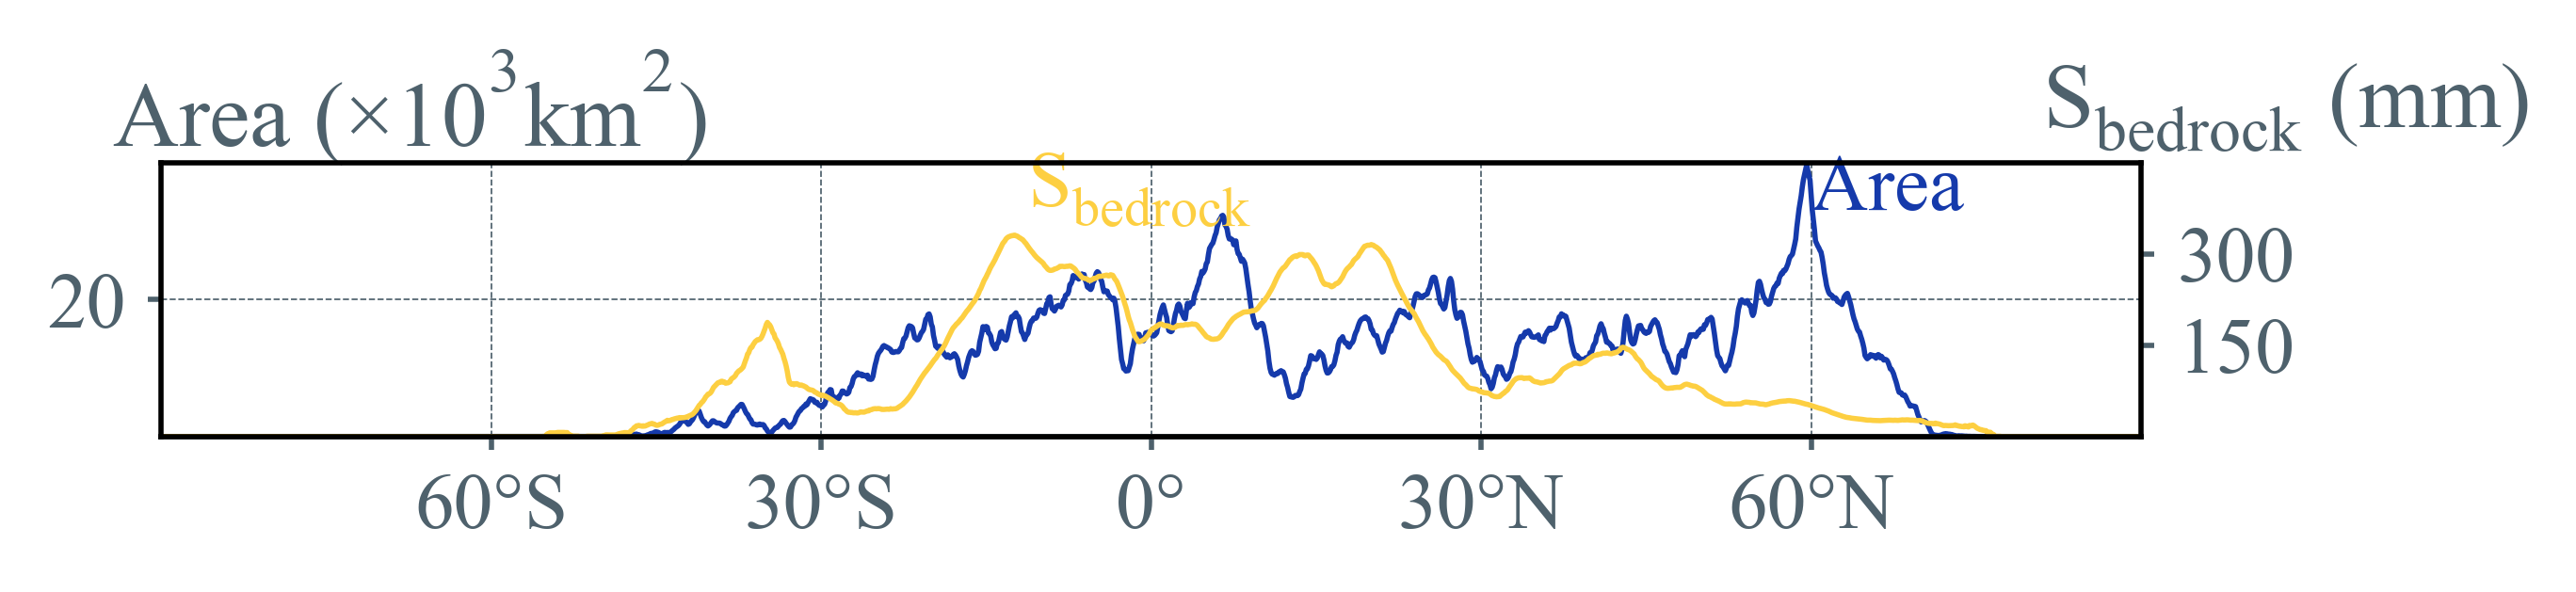

,Unnamed: 0,lat,lon,Sbedrock,Sr,Ssoil,Area,Koppen,IGBP,Continent,Subregion,Sovereignt,Continent_short,Subregion_short,Sovereignt_short
0,0,-55.25,-66.55,4.320986,72.192170,67.873250,70479960.0,29,5,South America,South America,Chile,SA,SA,CHL
1,1,-54.95,-67.55,2.827930,69.175810,66.345470,71010940.0,29,4,South America,South America,Chile,SA,SA,CHL
2,2,-54.95,-66.05,92.192160,124.329610,32.137680,71010940.0,29,9,South America,South America,Argentina,SA,SA,ARG
3,3,-54.85,-65.75,39.953026,167.939560,127.988495,71187510.0,29,1,South America,South America,Argentina,SA,SA,ARG
4,4,-54.85,-65.65,32.279675,162.632420,130.354800,71187510.0,29,1,South America,South America,Argentina,SA,SA,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169848,169848,74.15,105.95,3.792372,63.201977,59.403675,33773776.0,29,7,Asia,Eastern Europe,Russia,AS,EEU,RUS
169849,169849,74.45,108.95,59.713875,59.717600,0.000000,33150462.0,29,7,Asia,Eastern Europe,Russia,AS,EEU,RUS
169850,169850,74.65,92.55,15.885224,44.881016,28.991125,32734400.0,29,7,Asia,Eastern Europe,Russia,AS,EEU,RUS
169851,169851,74.75,94.95,56.937702,56.941536,0.000000,32526226.0,29,7,Asia,Eastern Europe,Russia,AS,EEU,RUS


In [14]:
fig = plt.figure(figsize=(6, 2), dpi=500)
gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[:, :])

# ax1 = fig.add_subplot(gs[1:, 0])


df_area = df.copy()
# lat = pd.Series(np.arange(-89.997916666558, 90, 0.00416666688397527))
lat = pd.Series((np.arange(-90, 90, 0.1)).round(2))

lat_area = df_area.groupby('lat')['Area'].sum().div(1e9)
lat_area_0p1 = lat_area.groupby(np.floor(lat_area.index * 10) / 10).sum()
lat_Sb = df_area.groupby('lat')['Sbedrock'].mean()
lat_Sb_0p1 = lat_Sb.groupby(np.floor(lat_Sb.index * 10) / 10).mean()

lat_area_df = lat_area_0p1.reindex(lat, fill_value=0)
lat_Sb_df = lat_Sb_0p1.reindex(lat, fill_value=0)

# print(lat_area.index)
# print(lat_area_df.index)
print(lat_area_df)
print(lat_Sb_df)


plot_line(["Area (\u00D7$10^3$$km^2$)","$S_{{bedrock}}$ (mm)"], ax, lat_area_df.index, lat_area_df, lat_Sb_df, color = ["#153aab","#fdcf41"])

plt.tight_layout()
plt.show()
# plt.savefig(f"{fig_path}/l2_lat.png",dpi=500, bbox_inches='tight')

df_area


In [6]:
print(lat_area_df[(lat_area_df.index>-23.5) & (lat_area_df.index<23.5)].sum())
print(lat_area_df[(lat_area_df.index>50) & (lat_area_df.index<66.5)].sum())


7705.110378488
3304.248230422


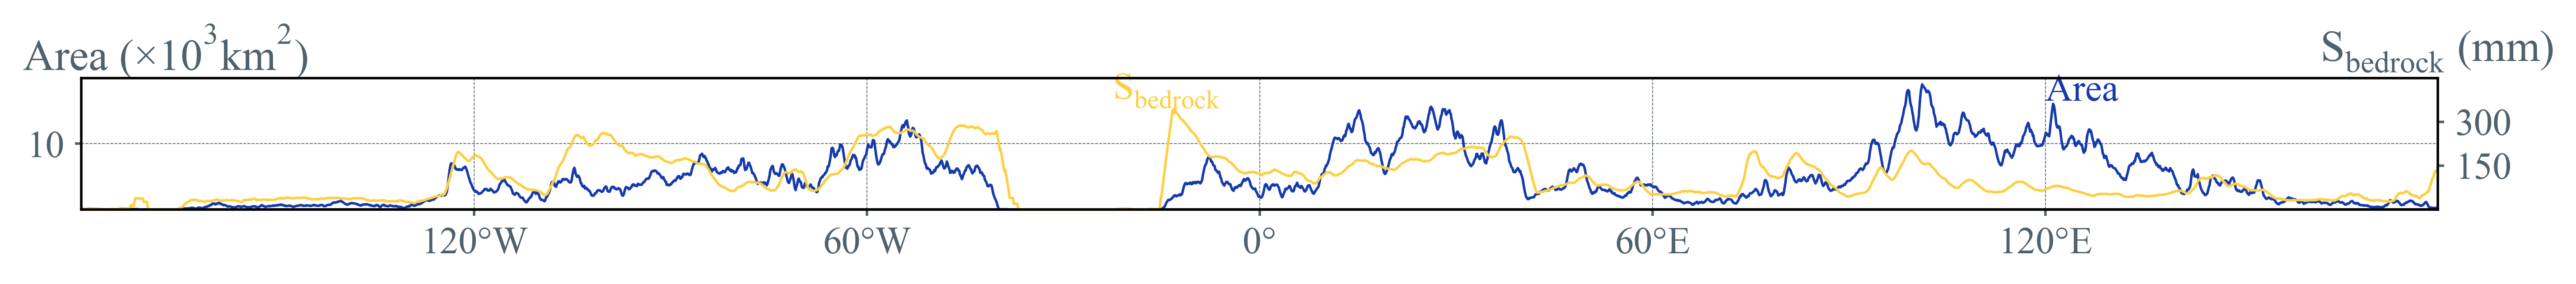

In [13]:
fig = plt.figure(figsize=(12, 2), dpi=500)
gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[:, :])

# ax = fig.add_subplot(gs[0, 1:])

df_area = df.copy()

# lon = pd.Series(np.arange(-179.997916666558, 180, 0.00416666688397527))
lon = pd.Series((np.arange(-180, 180, 0.1)).round(2))
lon_area = df_area.groupby('lon')['Area'].sum().div(1e9)
lon_area_0p1 = lon_area.groupby(np.floor(lon_area.index * 10) / 10).sum()
lon_Sb = df_area.groupby('lon')['Sbedrock'].mean()
lon_Sb_0p1 = lon_Sb.groupby(np.floor(lon_Sb.index * 10) / 10).mean()

lon_area_df = lon_area_0p1.reindex(lon, fill_value=0)
lon_Sb_df = lon_Sb_0p1.reindex(lon, fill_value=0)



plot_line(["Area (\u00D7$10^3$$km^2$)","$S_{{bedrock}}$ (mm)"], ax, lon_area_df.index, lon_area_df, lon_Sb_df, color = ["#153aab","#fdcf41"])


plt.tight_layout()
plt.show()
# plt.savefig(f"{fig_path}/l2_lon.png",dpi=500, bbox_inches='tight')

In [8]:
name = ['Sbedrock', 'Sbedrock', 'Sb', '$S_{{bedrock}}$ (mm)']
level = np.arange(0,500,50)
rgb_list = ['#606060','#8ec0cb','#00CC66','#66CC00',
                                '#69aa4c','#CCCC00','#ebc874','#99004C','#FF6666']
cmap = colors.ListedColormap(rgb_list)

df1 = pd.read_csv(f'{data_path}csv/Global_S.csv')
df1 = df1[df1[name[0]] > 0]

In [9]:
font_properties = fm.FontProperties(weight='bold')

# fig = plt.figure(figsize=(12, 6), dpi=500)

# fig.subplots_adjust(left=0.05, right=0.98, 
#                 bottom=0.14, top=0.95, hspace=0.25) 
    
#Create a subgraph grid with 2 rows and 3 columns
# gs = GridSpec(2, 6)
ax3 = fig.add_subplot(gs[1:, 1:], projection=ccrs.PlateCarree())

# Set drawing mode(note:extent's lat from positive to negative)
img = ax3.scatter(df1['lon'], df1['lat'], c=df1[name[0]], 
                s=size, linewidths=0, edgecolors="k", 
                cmap=cmap, zorder=1, vmin=level[0], vmax=level[-1])

for spine in ax3.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(2)  

ax3.set_xlim(region[0], region[1])
ax3.set_ylim(region[2], region[3])

# coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='0.6', facecolor='none')
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m', edgecolor='0.6', facecolor='none')
ax3.add_feature(cfeature.LAND, facecolor='0.95')
# ax.add_feature(coastline, linewidth=0.6)
ax3.add_feature(cfeature.LAKES, alpha=1, facecolor='white', edgecolor='white')
ax3.add_feature(rivers, linewidth=0.8)
# ax.gridlines(draw_labels=False, linestyle=':', linewidth=0.7, color='grey', alpha=0.8)

ax3.add_feature(cfeature.COASTLINE)
ax3.set_extent(region)
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())

    # From the bottom left corner x, y, width, height
cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.04], frameon = False) 
cb = fig.colorbar(img, 
                drawedges=False,
                ticks=level, 
                cax=cbar_ax, 
                orientation='horizontal',
                spacing='uniform')

cb.ax.tick_params(labelsize=20)
cb.ax.yaxis.set_tick_params(direction='out', width=1.5)
for label in cb.ax.get_xticklabels() + cb.ax.get_yticklabels():
    label.set_fontproperties(font_properties)
cb.set_label(f'{name[3]}', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>